In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import plotly.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline


In [2]:
input_files = os.path.join('.','Resources','*.csv')
# files = [f for f in glob.glob(input_files)]
df_data=pd.concat([pd.read_csv(file)for file in glob.glob(input_files)])

df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40900 entries, 0 to 192
Data columns (total 9 columns):
State                    40900 non-null object
ZipCode                  40900 non-null int64
TaxRegionName            40900 non-null object
StateRate                40900 non-null float64
EstimatedCombinedRate    40900 non-null float64
EstimatedCountyRate      40900 non-null float64
EstimatedCityRate        40900 non-null float64
EstimatedSpecialRate     40900 non-null float64
RiskLevel                40900 non-null int64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.1+ MB


In [3]:
df_data["ZipCode"]= df_data["ZipCode"].astype('str')
# 5-df_data["ZipCode"].apply(len)
df_data["ZipCode"] = df_data["ZipCode"].str.pad(5, side ='left', fillchar ='0')
# df_data[df_data["State"]=='PR']

In [4]:
states = [{'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}]
states
df_states= pd.DataFrame(states).T

df_states.reset_index(inplace=True)
df_states.rename(columns={0:"State Name","index":"State"},inplace=True)
df_states
# df_data['State Name'] = df['State'].replace('\s*\d+]', '', regex=True)

,State,State Name
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AS,American Samoa
4,AZ,Arizona
5,CA,California
6,CO,Colorado
7,CT,Connecticut
8,DC,District of Columbia
9,DE,Delaware


In [5]:
df_data=df_data.merge(df_states,how="inner", on = "State")
df_data["Local Taxes"]=df_data["EstimatedCountyRate"] + df_data["EstimatedCityRate"] + df_data["EstimatedSpecialRate"]
df_data.head()

,State,ZipCode,TaxRegionName,StateRate,EstimatedCombinedRate,EstimatedCountyRate,EstimatedCityRate,EstimatedSpecialRate,RiskLevel,State Name,Local Taxes
0,AK,99501,ALASKA STATE,0.0,0.0,0.0,0.0,0.0,1,Alaska,0.0
1,AK,99502,ALASKA STATE,0.0,0.0,0.0,0.0,0.0,1,Alaska,0.0
2,AK,99503,ALASKA STATE,0.0,0.0,0.0,0.0,0.0,1,Alaska,0.0
3,AK,99504,ALASKA STATE,0.0,0.0,0.0,0.0,0.0,1,Alaska,0.0
4,AK,99505,ALASKA STATE,0.0,0.0,0.0,0.0,0.0,1,Alaska,0.0


In [6]:
grp_by_state = df_data.groupby(["State","State Name"])

In [7]:
df_state_tax = grp_by_state[["StateRate"]].mean()
df_state_tax

,,StateRate
State,State Name,
AK,Alaska,0.000000
AL,Alabama,0.040000
AR,Arkansas,0.065000
AZ,Arizona,0.056000
CA,California,0.060000
CO,Colorado,0.029000
CT,Connecticut,0.063500
DC,District of Columbia,0.060000
DE,Delaware,0.000000


# States with no state sales tax


In [8]:
# df_state_tax["Has State Tax"] = df_state_tax.apply(lambda x: True if x["StateRate"]==0.0 else False,axis=1)
df_state_tax["Has State Tax"] = df_state_tax["StateRate"]!=0.0 

df_state_tax[df_state_tax["Has State Tax"]==False][[]]

,
State,State Name
AK,Alaska
DE,Delaware
MT,Montana
NH,New Hampshire
OR,Oregon


# States with state sales tax

In [9]:
df_state_tax[df_state_tax["Has State Tax"]==True][["StateRate"]]


,,StateRate
State,State Name,
AL,Alabama,0.040000
AR,Arkansas,0.065000
AZ,Arizona,0.056000
CA,California,0.060000
CO,Colorado,0.029000
CT,Connecticut,0.063500
DC,District of Columbia,0.060000
FL,Florida,0.060000
GA,Georgia,0.040000


# Pie Chart


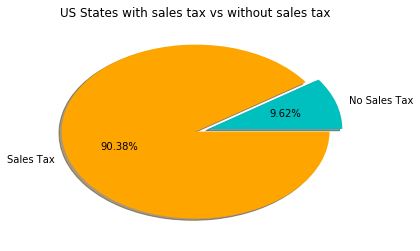

<Figure size 432x288 with 0 Axes>

In [10]:
df_cnt = df_state_tax.groupby("Has State Tax").count()
df_cnt
plt.pie(df_cnt["StateRate"],labels=["No Sales Tax","Sales Tax"]  ,colors=['c','orange'] ,explode=[0.1,0],shadow=True,
       autopct="%1.2f%%")
plt.title("US States with sales tax vs without sales tax")
plt.show()
plt.tight_layout()

In [11]:
df_local_tax = grp_by_state[["Local Taxes"]].mean()
df_local_tax

,,Local Taxes
State,State Name,
AK,Alaska,0.018930
AL,Alabama,0.040218
AR,Arkansas,0.021232
AZ,Arizona,0.023141
CA,California,0.023012
CO,Colorado,0.032664
CT,Connecticut,0.000000
DC,District of Columbia,0.000000
DE,Delaware,0.000000


# States with no Local Taxes

In [12]:
df_local_tax["Has Local Tax"] = df_local_tax["Local Taxes"]!=0.0 

df_local_tax[df_local_tax["Has Local Tax"]==False][[]]

,
State,State Name
CT,Connecticut
DC,District of Columbia
DE,Delaware
IN,Indiana
KY,Kentucky
MA,Massachusetts
MD,Maryland
ME,Maine
MI,Michigan


# States with local taxes

In [13]:

df_local_tax[df_local_tax["Has Local Tax"]==True][["Local Taxes"]]

,,Local Taxes
State,State Name,
AK,Alaska,0.018930
AL,Alabama,0.040218
AR,Arkansas,0.021232
AZ,Arizona,0.023141
CA,California,0.023012
CO,Colorado,0.032664
FL,Florida,0.008291
GA,Georgia,0.034522
HI,Hawaii,0.002518


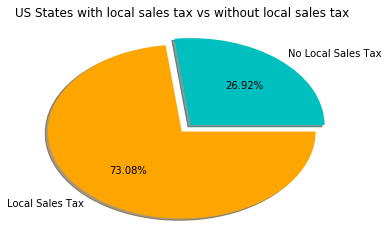

<Figure size 432x288 with 0 Axes>

In [14]:
df_local = df_local_tax.groupby("Has Local Tax").count()
#df_local
plt.pie(df_local["Local Taxes"],labels=["No Local Sales Tax","Local Sales Tax"]  ,colors=['c','orange'] ,explode=[0.1,0],shadow=True,
       autopct="%1.2f%%")
plt.title("US States with local sales tax vs without local sales tax")
plt.show()
plt.tight_layout()

### Top 5 States that have higher overall sales taxes

In [15]:
df_total_tax = grp_by_state[["EstimatedCombinedRate"]].mean()*100
df_total_tax.sort_values(by="EstimatedCombinedRate",ascending=False).head()

,,EstimatedCombinedRate
State,State Name,
PR,Puerto Rico,11.465909
TN,Tennessee,9.490409
LA,Louisiana,9.139608
WA,Washington,8.690014
AR,Arkansas,8.623227


### Top 5 States that have lower overall sales taxes

In [16]:
df_total_tax.sort_values(by="EstimatedCombinedRate",ascending=True).head()

,,EstimatedCombinedRate
State,State Name,
OR,Oregon,0.000000
NH,New Hampshire,0.000000
MT,Montana,0.000000
DE,Delaware,0.000000
AK,Alaska,1.892989


In [17]:
df_total_tax.reset_index(inplace=True)
df_total_tax.head()

,State,State Name,EstimatedCombinedRate
0,AK,Alaska,1.892989
1,AL,Alabama,8.021786
2,AR,Arkansas,8.623227
3,AZ,Arizona,7.914110
4,CA,California,8.301201


In [18]:


for col in df_total_tax.columns:
    df_total_tax[col] = df_total_tax[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df_total_tax['text'] = df_total_tax['State'] + '<br>' +\
    'EstimatedCombinedRate '+df_total_tax['EstimatedCombinedRate']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations =  df_total_tax['State'],
        z = df_total_tax['EstimatedCombinedRate']*100,
        locationmode = 'USA-states',
        text = df_total_tax['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Combined Tax Rate")
        ) ]

layout = dict(
        title = 'Combined Tax Rates by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

### Average City Tax in each State

In [19]:
df_city_tax = grp_by_state[["EstimatedCityRate"]].mean()*100
df_city_tax.head()

,,EstimatedCityRate
State,State Name,
AK,Alaska,1.496310
AL,Alabama,1.853832
AR,Arkansas,0.590248
AZ,Arizona,1.550345
CA,California,0.156916


In [20]:
df_city_tax.reset_index(inplace=True)

In [21]:
df_city_tax = df_city_tax[["State","State Name","EstimatedCityRate"]]
df_city_tax.sort_values("EstimatedCityRate",ascending=False).head()

,State,State Name,EstimatedCityRate
36,OK,Oklahoma,2.303928
1,AL,Alabama,1.853832
5,CO,Colorado,1.776842
18,LA,Louisiana,1.644845
3,AZ,Arizona,1.550345


In [22]:
df_city_tax.sort_values("EstimatedCityRate",ascending=False).tail()
df_city_tax.index
list(df_city_tax.loc[0,["State"]])


['AK']

### Bubble Plot of City Taxes in Each State

<function matplotlib.pyplot.show(*args, **kw)>

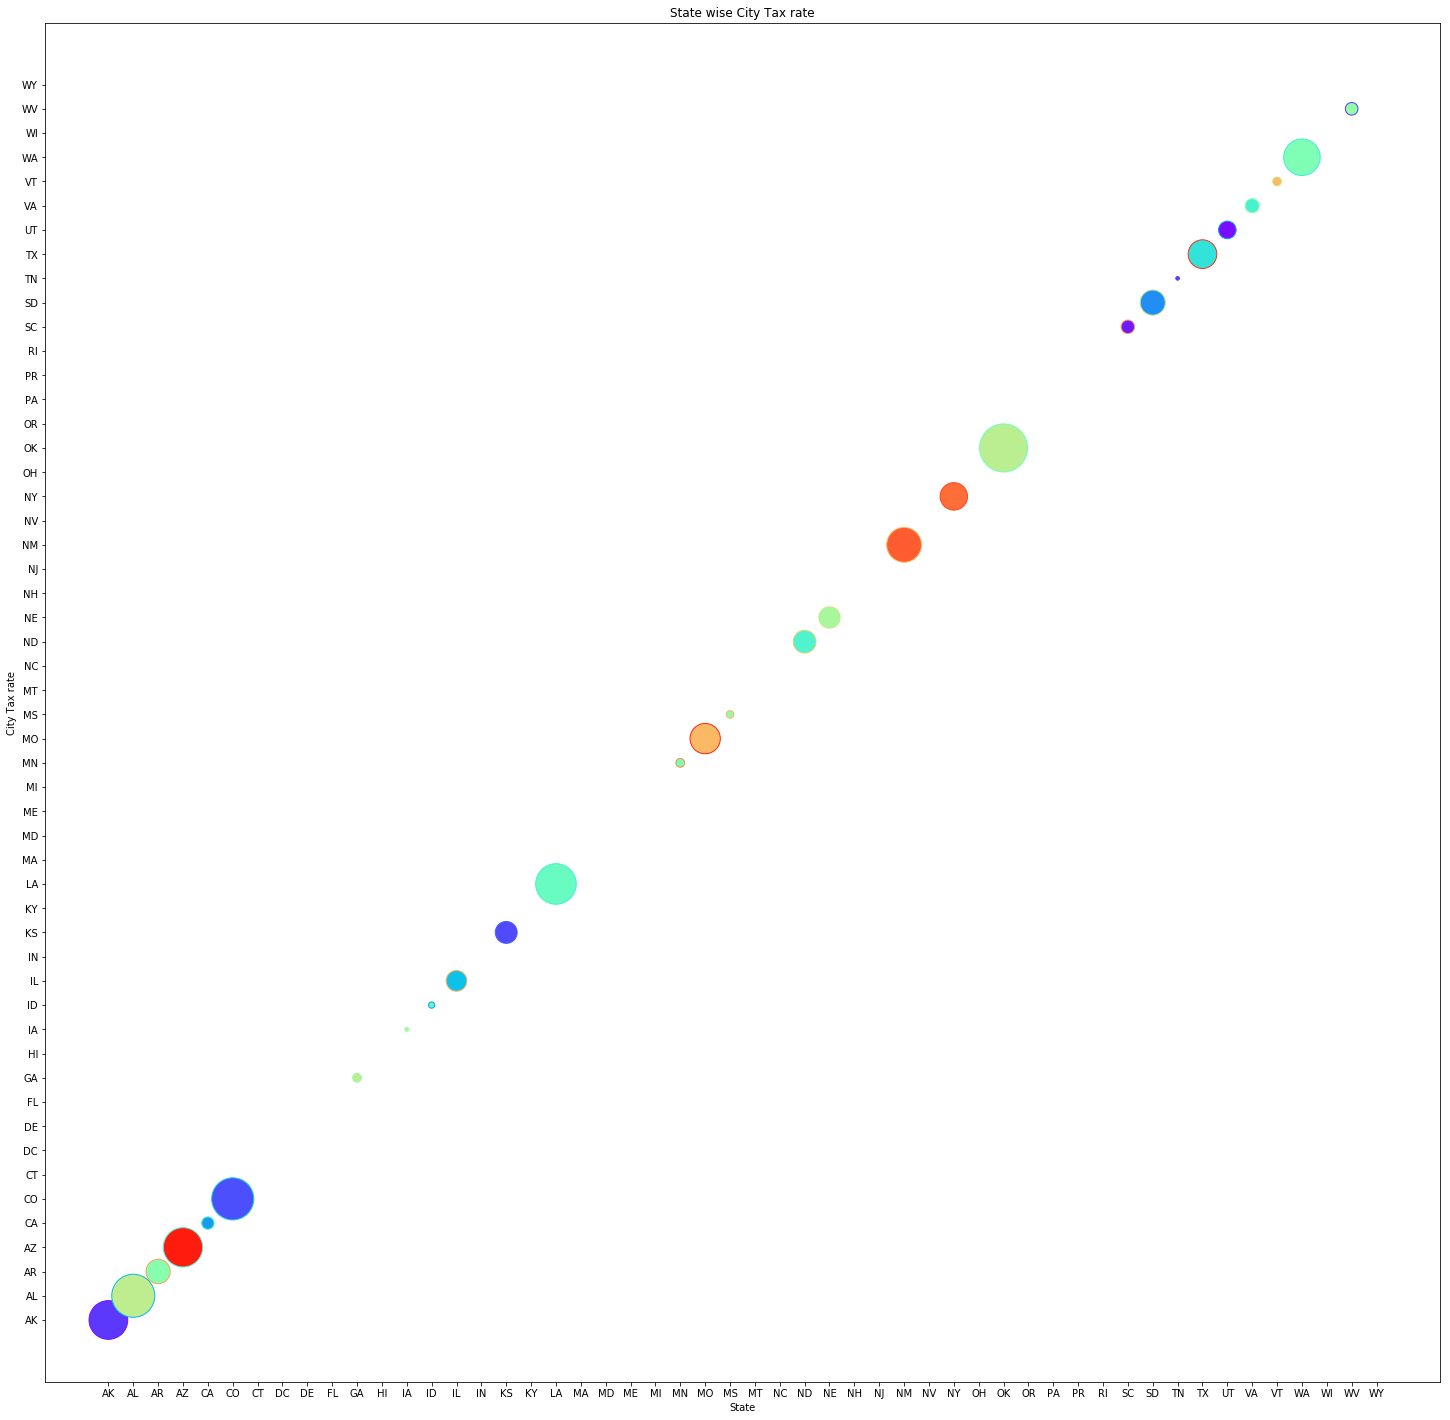

In [23]:
plt.figure(figsize=(25,25))
colors=cm.rainbow(np.random.rand(df_city_tax["State"].count()))
edgecolors=cm.rainbow(np.random.rand(df_city_tax["State"].count()))
plt.scatter(df_city_tax["State"],y=df_city_tax["State"], s=df_city_tax["EstimatedCityRate"]*1000,
            color=colors,edgecolor=edgecolors)
# for idx in df_city_tax.index:
#     plt.annotate(df_city_tax.loc[idx,["State Name"]],xy=(tuple(df_city_tax.loc[idx,["State"]],df_city_tax.loc[idx,["EstimatedCityRate"]])))
plt.xlabel('State')
plt.ylabel('City Tax rate')
plt.title('State wise City Tax rate')
plt.show

### Categorize states based on number of type of taxes and find the number of type of taxes are affecting the overall tax

In [24]:
df_tax_info = grp_by_state["EstimatedCombinedRate","StateRate","EstimatedCountyRate","EstimatedCityRate","EstimatedSpecialRate"].mean()
df_tax_info.head()

,,EstimatedCombinedRate,StateRate,EstimatedCountyRate,EstimatedCityRate,EstimatedSpecialRate
State,State Name,,,,,
AK,Alaska,0.018930,0.000,0.003967,0.014963,0.000000
AL,Alabama,0.080218,0.040,0.019246,0.018538,0.002434
AR,Arkansas,0.086232,0.065,0.015330,0.005902,0.000000
AZ,Arizona,0.079141,0.056,0.007596,0.015503,0.000041
CA,California,0.083012,0.060,0.002500,0.001569,0.018943


In [25]:
df_tax_info.reset_index(inplace=True)
df_tax_info.head()

,State,State Name,EstimatedCombinedRate,StateRate,EstimatedCountyRate,EstimatedCityRate,EstimatedSpecialRate
0,AK,Alaska,0.018930,0.000,0.003967,0.014963,0.000000
1,AL,Alabama,0.080218,0.040,0.019246,0.018538,0.002434
2,AR,Arkansas,0.086232,0.065,0.015330,0.005902,0.000000
3,AZ,Arizona,0.079141,0.056,0.007596,0.015503,0.000041
4,CA,California,0.083012,0.060,0.002500,0.001569,0.018943


In [26]:
df_tax_info_cnt = df_tax_info.copy()
for col in df_tax_info_cnt.columns:
    if "Rate" in col:
        df_tax_info_cnt.loc[df_tax_info[col]>0 , col]=1
df_tax_info_cnt["TaxTypeCount"] = [ 
                              row.StateRate + row.EstimatedCountyRate
                               +row.EstimatedCityRate+row.EstimatedSpecialRate 
                               for index, row in df_tax_info_cnt.iterrows()
                              ] 

#     "StateRate","EstimatedCountyRate","EstimatedCityRate","EstimatedSpecialRate")
df_tax_info_cnt.head()

     

,State,State Name,EstimatedCombinedRate,StateRate,EstimatedCountyRate,EstimatedCityRate,EstimatedSpecialRate,TaxTypeCount
0,AK,Alaska,1.0,0.0,1.0,1.0,0.0,2.0
1,AL,Alabama,1.0,1.0,1.0,1.0,1.0,4.0
2,AR,Arkansas,1.0,1.0,1.0,1.0,0.0,3.0
3,AZ,Arizona,1.0,1.0,1.0,1.0,1.0,4.0
4,CA,California,1.0,1.0,1.0,1.0,1.0,4.0


In [27]:
df_tax_info["TaxTypeCount"] = df_tax_info_cnt["TaxTypeCount"] 
df_tax_info.head()

,State,State Name,EstimatedCombinedRate,StateRate,EstimatedCountyRate,EstimatedCityRate,EstimatedSpecialRate,TaxTypeCount
0,AK,Alaska,0.018930,0.000,0.003967,0.014963,0.000000,2.0
1,AL,Alabama,0.080218,0.040,0.019246,0.018538,0.002434,4.0
2,AR,Arkansas,0.086232,0.065,0.015330,0.005902,0.000000,3.0
3,AZ,Arizona,0.079141,0.056,0.007596,0.015503,0.000041,4.0
4,CA,California,0.083012,0.060,0.002500,0.001569,0.018943,4.0


In [28]:
grp_tax_cnt = df_tax_info.groupby("TaxTypeCount")

In [29]:
print(grp_tax_cnt["State"].count())

TaxTypeCount
0.0     4
1.0    10
2.0    11
3.0     9
4.0    18
Name: State, dtype: int64


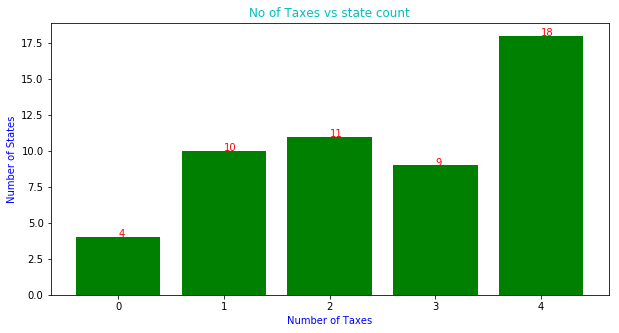

In [30]:
x=grp_tax_cnt["State"].count().index
y=grp_tax_cnt["State"].count()
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(10,5), squeeze=True)
ax.bar( x,y,color='g')
ax.set_title("No of Taxes vs state count",color='c')
ax.set_xlabel("Number of Taxes",color='b')
ax.set_ylabel("Number of States",color='b')
for val in range(0,5):
    ax.annotate(s=y[val],xy=(x[val],y[val]),color='r')
plt.show()

In [31]:
grp_tax_cnt["EstimatedCombinedRate"].mean()*100

TaxTypeCount
0.0    0.000000
1.0    6.272500
2.0    6.286897
3.0    6.912657
4.0    7.495378
Name: EstimatedCombinedRate, dtype: float64

### Bar Graph showing the total salex tax variation  wrt no of type of taxes

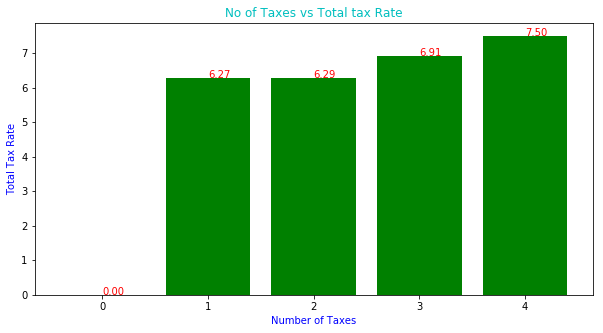

In [32]:
x=grp_tax_cnt["EstimatedCombinedRate"].mean().index
y=grp_tax_cnt["EstimatedCombinedRate"].mean()*100
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(10,5), squeeze=True)
ax.bar( x,y,color='g')
ax.set_title("No of Taxes vs Total tax Rate",color='c')
ax.set_xlabel("Number of Taxes",color='b')
ax.set_ylabel("Total Tax Rate",color='b')
# s='{:.2f}'.format(y[val])
for val in range(0,5):
    ax.annotate(s='{:.2f}'.format(y[val]),xy=(x[val],y[val]),color='r')
plt.show()

In [33]:
# grp_tax_cnt.boxplot(by='TaxTypeCount', 
#                        column=['EstimatedCombinedRate'], 
#                        grid=False)
# plt.show()

### Analysis of Puerto Rico (highest tax rate)

In [34]:
df_data_pr = df_data[df_data["State"]=="PR"]
df_data_pr.head()

,State,ZipCode,TaxRegionName,StateRate,EstimatedCombinedRate,EstimatedCountyRate,EstimatedCityRate,EstimatedSpecialRate,RiskLevel,State Name,Local Taxes
31862,PR,00601,ADJUNTAS CO,0.105,0.115,0.01,0.0,0.0,1,Puerto Rico,0.01
31863,PR,00602,AGUADA CO,0.105,0.115,0.01,0.0,0.0,1,Puerto Rico,0.01
31864,PR,00603,AGUADILLA CO,0.105,0.115,0.01,0.0,0.0,1,Puerto Rico,0.01
31865,PR,00604,AGUADILLA CO,0.105,0.115,0.01,0.0,0.0,1,Puerto Rico,0.01
31866,PR,00605,AGUADILLA CO,0.105,0.115,0.01,0.0,0.0,1,Puerto Rico,0.01


### Zip codes of PR with top 5 total tax rate

In [35]:
df_data_pr.sort_values(by="EstimatedCombinedRate",ascending=False ).head()

,State,ZipCode,TaxRegionName,StateRate,EstimatedCombinedRate,EstimatedCountyRate,EstimatedCityRate,EstimatedSpecialRate,RiskLevel,State Name,Local Taxes
31862,PR,00601,ADJUNTAS CO,0.105,0.115,0.01,0.0,0.0,1,Puerto Rico,0.01
31982,PR,00917,SAN JUAN CO,0.105,0.115,0.01,0.0,0.0,1,Puerto Rico,0.01
31974,PR,00909,SAN JUAN CO,0.105,0.115,0.01,0.0,0.0,1,Puerto Rico,0.01
31975,PR,00910,SAN JUAN CO,0.105,0.115,0.01,0.0,0.0,1,Puerto Rico,0.01
31976,PR,00911,SAN JUAN CO,0.105,0.115,0.01,0.0,0.0,1,Puerto Rico,0.01
